# 📑 Table of Contents

- [1.Imports](#Imports)  
- [2.Load Data](#Load-Player-Data)  
- [3. Define configurations (Genetic Algorithm)](#Define-configurations-(Genetic-Algorithm))  
  - [3.1 Run Genetic Algorithm for each config](#Run-Genetic-Algorithm-for-each-config)
  - [3.2 Fitness evolution plot (Genetic Algorithm)](#Fitness-evolution-plot-(Genetic-Algorithm))
  - [3.3 Display team composition of best solution found (Genetic Algorithm)](#Display-team-composition-of-best-solution-found-(Genetic-Algorithm))

- [4. Run Hill climbing](#Run-Hill-climbing)  
  - [4.1 Combined Line Plot (Fitness Over Generations)](#Combined-Line-Plot-(Fitness-Over-Generations))  
  - [4.2 Fitness configuration bar plot](#Fitness-configuration-bar-plot)  
- [5. Run Simulated Annealing](#Run-Simulated-Annealing)  
  - [5.1 Display Best Config](#Display-Best-Config)  
  - [5.2 Summary Table](#Summary-Table)  
  - [5.3 Plotting Fitness Evolution](#Plotting-Fitness-Evolution)  
  - [5.4 Final Bar Plot](#Final-Bar-Plot)
- [6. Final Team Assignments for Best GA Configuration](#Final-Team-Assignments-for-Best-GA-Configuration ) 

## Imports

In [78]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from solution import LeagueSolution, LeagueHillClimbingSolution
from evolution import genetic_algorithm, hill_climbing, simulated_annealing
from operators import (
    mutate_swap,
    mutate_team_shift,
    mutate_shuffle_team,
    crossover_one_point,
    crossover_uniform,
    selection_tournament,
    selection_ranking
)

## Load Player Data

In [5]:
players = pd.read_csv("sports players.csv", sep=";").to_dict(orient="records")
players

[{'Name': 'Alex Carter', 'Position': 'GK', 'Skill': 85, 'Salary': 90},
 {'Name': 'Jordan Smith', 'Position': 'GK', 'Skill': 88, 'Salary': 100},
 {'Name': 'Ryan Mitchell', 'Position': 'GK', 'Skill': 83, 'Salary': 85},
 {'Name': 'Chris Thompson', 'Position': 'GK', 'Skill': 80, 'Salary': 80},
 {'Name': 'Blake Henderson', 'Position': 'GK', 'Skill': 87, 'Salary': 95},
 {'Name': 'Daniel Foster', 'Position': 'DEF', 'Skill': 90, 'Salary': 110},
 {'Name': 'Lucas Bennett', 'Position': 'DEF', 'Skill': 85, 'Salary': 90},
 {'Name': 'Owen Parker', 'Position': 'DEF', 'Skill': 88, 'Salary': 100},
 {'Name': 'Ethan Howard', 'Position': 'DEF', 'Skill': 80, 'Salary': 70},
 {'Name': 'Mason Reed', 'Position': 'DEF', 'Skill': 82, 'Salary': 75},
 {'Name': 'Logan Brooks', 'Position': 'DEF', 'Skill': 86, 'Salary': 95},
 {'Name': 'Caleb Fisher', 'Position': 'DEF', 'Skill': 84, 'Salary': 85},
 {'Name': 'Nathan Wright', 'Position': 'MID', 'Skill': 92, 'Salary': 120},
 {'Name': 'Connor Hayes', 'Position': 'MID', 'S

## Define configurations (Genetic Algorithm)

In [7]:
configs = [
    (mutate_swap, crossover_one_point, selection_tournament),
    (mutate_team_shift, crossover_uniform, selection_ranking),
    (mutate_shuffle_team, crossover_uniform, selection_tournament),
    (mutate_swap, crossover_uniform, selection_ranking)
]

results = []
best_solutions = []
summary_data = []

## Run Genetic Algorithm for each config

In [9]:
for i, (m_op, c_op, s_op) in enumerate(configs):
    print(f"Config {i+1} running ...")
    start = time.time()

    best, history = genetic_algorithm(
        players=players,
        mutation_operator=m_op,
        crossover_operator=c_op,
        selection_operator=s_op,
        generations=30
    )

    duration = time.time() - start
    fitness_value = best.fitness(players)

    results.append((f"Config {i+1}", history))
    best_solutions.append((f"Config {i+1}", best, fitness_value))
    summary_data.append({
        "Method": f"Config {i+1}",
        "Final Fitness (SD)": round(fitness_value, 4),
        "Iterations": 30,
        "Processing Time (s)": round(duration, 4)
    })
    print(f"Config {i+1} Processing time: {duration:.4f} seconds")

Config 1 running ...
Config 1 Processing time: 9.5410 seconds
Config 2 running ...
Config 2 Processing time: 24.2313 seconds
Config 3 running ...
Config 3 Processing time: 10.0522 seconds
Config 4 running ...
Config 4 Processing time: 22.5404 seconds


The standard deviation is related to optimization ability because it quantifies the dispersion or variability of a data set in relation to its mean. In optimization contexts, understanding variability can be crucial to identify the efficiency and accuracy of a process or model.

## Fitness evolution plot (Genetic Algorithm)

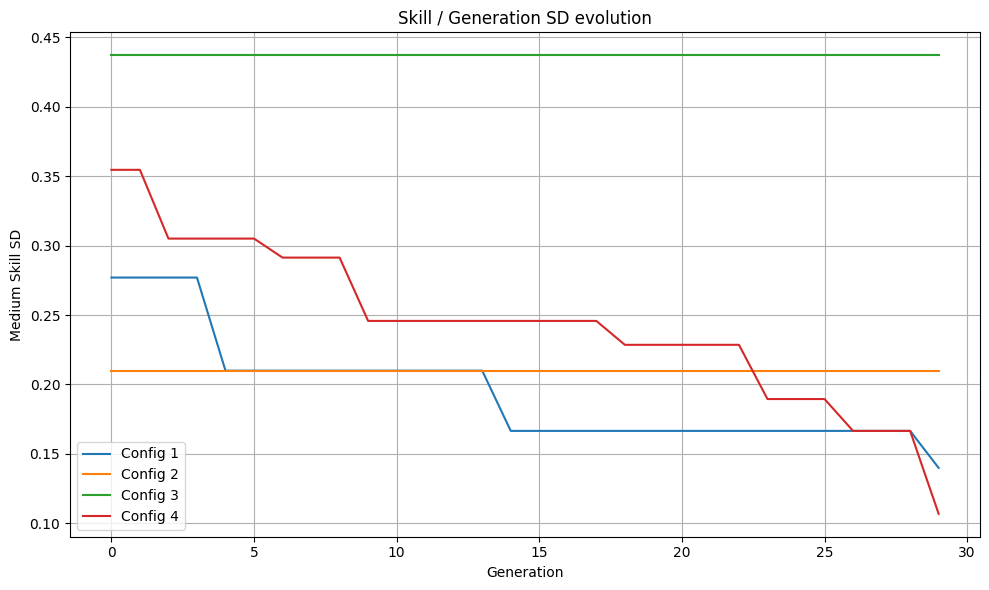

In [12]:
plt.figure(figsize=(10, 6))
for label, hist in results:
    plt.plot(hist, label=label)
plt.title("Skill / Generation SD evolution")
plt.xlabel("Generation")
plt.ylabel("Medium Skill SD")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Fitness configuration (Genetic Algorithm)

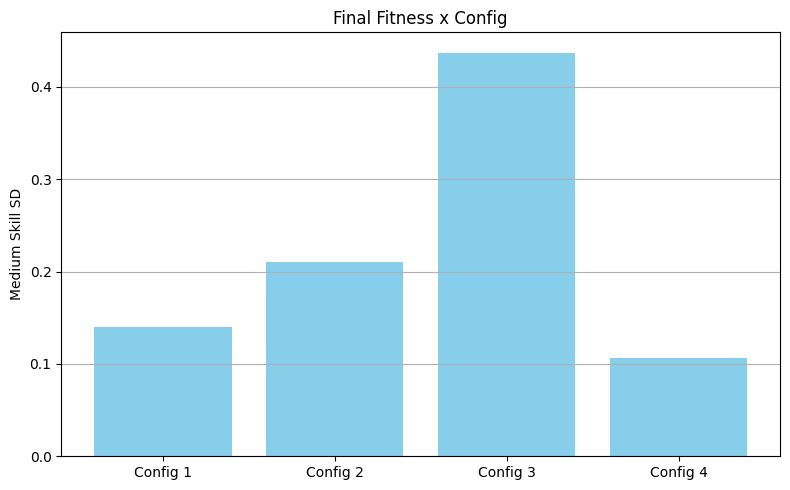

In [14]:
labels = [label for label, _, _ in best_solutions]
fitness_values = [fit for _, _, fit in best_solutions]

plt.figure(figsize=(8, 5))
plt.bar(labels, fitness_values, color='skyblue')
plt.title("Final Fitness x Config")
plt.ylabel("Medium Skill SD")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

## Display team composition of best solution found (Genetic Algorithm)

In [16]:
better = min(best_solutions, key=lambda x: x[2])
print(f"Best Config: {better[0]} | Fitness: {better[2]:.4f}")
teams = [[] for _ in range(5)]
for idx, team_id in enumerate(better[1].assignment):
    player = players[idx]
    teams[team_id].append((player["Name"], player["Position"], player["Skill"], player["Salary"]))

for i, team in enumerate(teams):
    print(f"\nTime {i+1}:")
    for p in team:
        print(f"  {p[0]:20s} | {p[1]:3s} | Skill: {p[2]} | Salary: €{p[3]}M")

Best Config: Config 4 | Fitness: 0.1069

Time 1:
  Jordan Smith         | GK  | Skill: 88 | Salary: €100M
  Logan Brooks         | DEF | Skill: 86 | Salary: €95M
  Austin Torres        | MID | Skill: 82 | Salary: €80M
  Xavier Bryant        | FWD | Skill: 90 | Salary: €120M
  Jaxon Griffin        | DEF | Skill: 79 | Salary: €65M
  Ashton Phillips      | MID | Skill: 90 | Salary: €110M
  Colton Gray          | FWD | Skill: 91 | Salary: €125M

Time 2:
  Chris Thompson       | GK  | Skill: 80 | Salary: €80M
  Owen Parker          | DEF | Skill: 88 | Salary: €100M
  Ethan Howard         | DEF | Skill: 80 | Salary: €70M
  Connor Hayes         | MID | Skill: 89 | Salary: €105M
  Landon Powell        | FWD | Skill: 89 | Salary: €110M
  Julian Scott         | FWD | Skill: 92 | Salary: €130M
  Dominic Bell         | MID | Skill: 86 | Salary: €95M

Time 3:
  Alex Carter          | GK  | Skill: 85 | Salary: €90M
  Daniel Foster        | DEF | Skill: 90 | Salary: €110M
  Caleb Fisher         | DEF

## Run Hill climbing

In [18]:
print("\nRunning Hill Climbing...")
start = time.time()
hc_solution, hc_history, hc_fitness = hill_climbing(players, verbose=True)
hc_time = time.time() - start

# Pad HC fitness list to 30 iterations
hc_padded = hc_fitness + [hc_fitness[-1]] * (30 - len(hc_fitness))

results.append(("Hill Climbing", hc_padded))
best_solutions.append(("Hill Climbing", hc_solution, hc_fitness))
summary_data.append({
    "Method": "Hill Climbing",
    "Final Fitness (SD)": round(hc_fitness[-1] if isinstance(hc_fitness, list) else hc_fitness, 4),
    "Iterations": len(hc_fitness) if isinstance(hc_fitness, list) else 1,
    "Processing Time (s)": round(hc_time, 4)
})
print(f"Hill Climbing Processing Time: {hc_time:.4f} seconds")
print("Hill Climbing Fitness:", hc_fitness)


Running Hill Climbing...
Iteration 0: fitness = 0.622044030202208
Iteration 1: fitness = 0.209956263667129
Iteration 2: fitness = 0.13997084244475427
Iteration 3: fitness = 0.10690449676496672
Hill Climbing Processing Time: 0.2078 seconds
Hill Climbing Fitness: [0.987265859609769, 0.622044030202208, 0.209956263667129, 0.13997084244475427, 0.10690449676496672]


## Combined Line Plot (Fitness Over Generations)

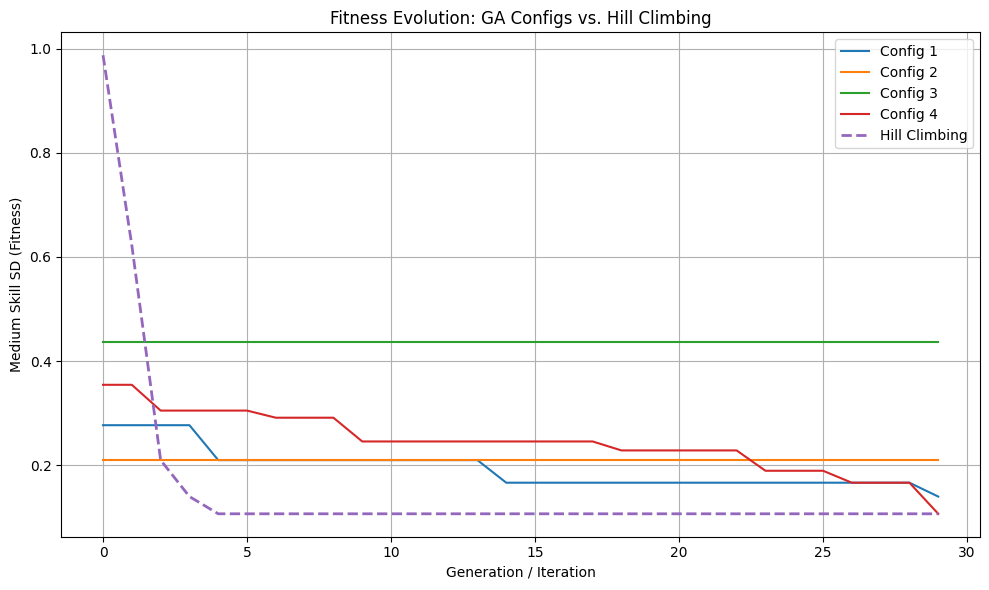

In [20]:
import matplotlib.pyplot as plt

# Plot Fitness Evolution: GA Configs vs. Hill Climbing
plt.figure(figsize=(10, 6))

# Plot each GA configuration
for label, hist in results:
    if label == "Hill Climbing":
        # Use dashed line style for hill climbing
        plt.plot(hist, label=label, linestyle='--', linewidth=2)
    else:
        plt.plot(hist, label=label)

# Deduplicate legend labels
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))  # Removes duplicate "Hill Climbing"
plt.legend(by_label.values(), by_label.keys())

# Labeling and formatting
plt.title("Fitness Evolution: GA Configs vs. Hill Climbing")
plt.xlabel("Generation / Iteration")
plt.ylabel("Medium Skill SD (Fitness)")
plt.grid(True)
plt.tight_layout()
plt.show()


## Fitness configuration bar plot

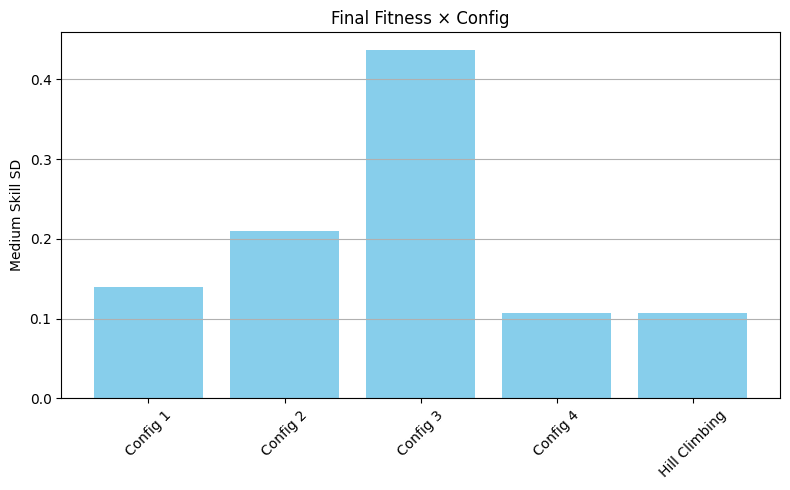

In [22]:
# Fitness configuration bar plot
labels = [label for label, _, _ in best_solutions]
fitness_values = [fit if isinstance(fit, float) else fit[-1] for _, _, fit in best_solutions]

plt.figure(figsize=(8, 5))
plt.bar(labels, fitness_values, color='skyblue')
plt.title("Final Fitness × Config")
plt.ylabel("Medium Skill SD")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


## Run Simulated Annealing

In [25]:
print("\nRunning Simulated Annealing...")
start = time.time()
sa_solution, sa_history, sa_fitness = simulated_annealing(players, verbose=True)
sa_time = time.time() - start

sa_padded = sa_history + [sa_history[-1]] * (30 - len(sa_history))
results.append(("Simulated Annealing", sa_padded))
best_solutions.append(("Simulated Annealing", sa_solution, sa_fitness))
summary_data.append({
    "Method": "Simulated Annealing",
    "Final Fitness (SD)": round(sa_fitness, 4),
    "Iterations": len(sa_history),
    "Processing Time (s)": round(sa_time, 4)
})
print(f"Simulated Annealing Processing Time: {sa_time:.4f} seconds")



Running Simulated Annealing...
Iteration 100: fitness = 0.574279, temp = 60.58
Iteration 200: fitness = 1.203397, temp = 36.70
Iteration 300: fitness = 0.537568, temp = 22.23
Iteration 400: fitness = 1.122679, temp = 13.47
Iteration 500: fitness = 0.574279, temp = 8.16
Iteration 600: fitness = 1.216888, temp = 4.94
Iteration 700: fitness = 0.940690, temp = 2.99
Iteration 800: fitness = 1.089467, temp = 1.81
Iteration 900: fitness = 0.595219, temp = 1.10
Iteration 1000: fitness = 0.552545, temp = 0.67
Simulated Annealing Processing Time: 40.8123 seconds


## Display Best Config

In [27]:
best_overall = min(best_solutions, key=lambda x: x[2] if isinstance(x[2], float) else x[2][-1])
fitness_value = best_overall[2] if isinstance(best_overall[2], float) else best_overall[2][-1]
print(f"\nBest Config: {best_overall[0]} | Fitness: {fitness_value:.4f}")


Best Config: Config 4 | Fitness: 0.1069


## Summary Table

In [29]:
summary_df = pd.DataFrame(summary_data)
print("\n--- Performance Summary ---")
print(summary_df)


--- Performance Summary ---
                Method  Final Fitness (SD)  Iterations  Processing Time (s)
0             Config 1              0.1400          30               9.5410
1             Config 2              0.2100          30              24.2313
2             Config 3              0.4371          30              10.0522
3             Config 4              0.1069          30              22.5404
4        Hill Climbing              0.1069           5               0.2078
5  Simulated Annealing              0.2770        1001              40.8123


## Plotting Fitness Evolution

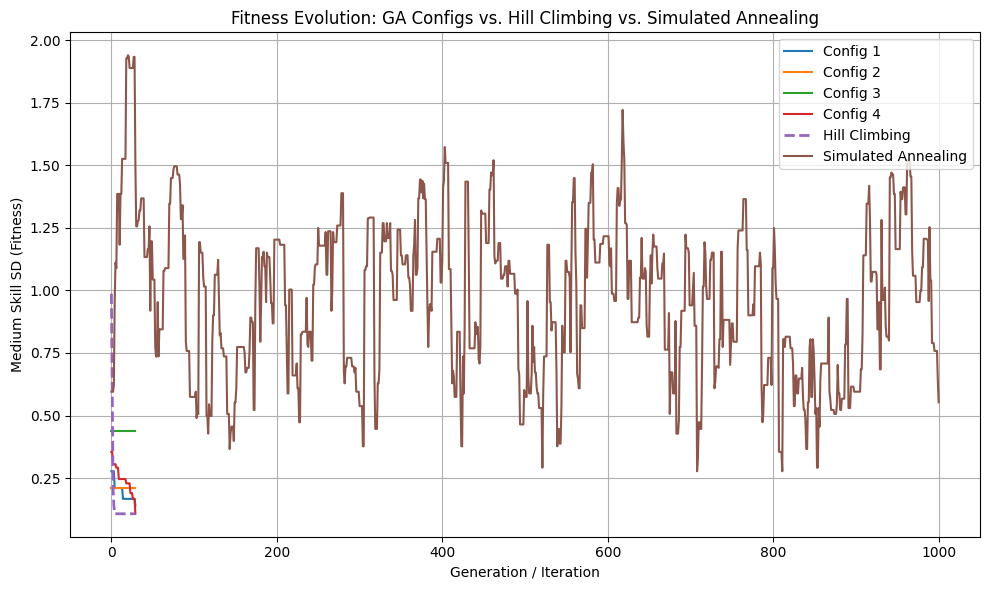

In [31]:
plt.figure(figsize=(10, 6))
for label, hist in results:
    if label == "Hill Climbing":
        plt.plot(hist, label=label, linestyle='--', linewidth=2)
    else:
        plt.plot(hist, label=label)

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.title("Fitness Evolution: GA Configs vs. Hill Climbing vs. Simulated Annealing")
plt.xlabel("Generation / Iteration")
plt.ylabel("Medium Skill SD (Fitness)")
plt.grid(True)
plt.tight_layout()
plt.show()

## Final Bar Plot

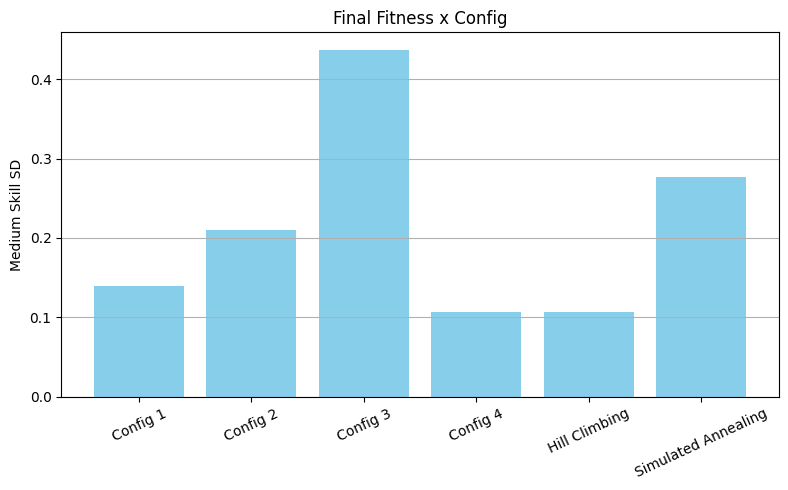

In [33]:
plt.figure(figsize=(8, 5))
plt.bar(summary_df['Method'], summary_df['Final Fitness (SD)'], color='skyblue')
plt.title("Final Fitness x Config")
plt.ylabel("Medium Skill SD")
plt.xticks(rotation=25)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

## Final Team Assignments for Best GA Configuration 

In [71]:
# Extract best solution
best_solution_obj = best_overall[1]

# Get number of teams and prepare containers
num_teams = best_solution_obj.num_teams
teams = [[] for _ in range(num_teams)]

# Assign players to teams
for idx, team_id in enumerate(best_solution_obj.assignment):
    player = players[idx]
    teams[team_id].append(player)

# Print nicely formatted rosters
print(f"\nBest Config: {best_overall[0]} | Fitness: {best_overall[2]:.4f}\n")

for i, team in enumerate(teams, 1):
    print(f"Time {i}:")
    for p in team:
        print(f"  {p['Name']:<20} | {p['Position']:>3} | Skill: {p['Skill']:>2} | Salary: €{p['Salary']}M")
    print()


Best Config: Config 4 | Fitness: 0.1069

Time 1:
  Jordan Smith         |  GK | Skill: 88 | Salary: €100M
  Logan Brooks         | DEF | Skill: 86 | Salary: €95M
  Austin Torres        | MID | Skill: 82 | Salary: €80M
  Xavier Bryant        | FWD | Skill: 90 | Salary: €120M
  Jaxon Griffin        | DEF | Skill: 79 | Salary: €65M
  Ashton Phillips      | MID | Skill: 90 | Salary: €110M
  Colton Gray          | FWD | Skill: 91 | Salary: €125M

Time 2:
  Chris Thompson       |  GK | Skill: 80 | Salary: €80M
  Owen Parker          | DEF | Skill: 88 | Salary: €100M
  Ethan Howard         | DEF | Skill: 80 | Salary: €70M
  Connor Hayes         | MID | Skill: 89 | Salary: €105M
  Landon Powell        | FWD | Skill: 89 | Salary: €110M
  Julian Scott         | FWD | Skill: 92 | Salary: €130M
  Dominic Bell         | MID | Skill: 86 | Salary: €95M

Time 3:
  Alex Carter          |  GK | Skill: 85 | Salary: €90M
  Daniel Foster        | DEF | Skill: 90 | Salary: €110M
  Caleb Fisher         | DE